# Dentist Data Aanalysis - Experiments

In [1]:
# !conda install -y -c anaconda numpy=1.19.2
# !conda install -y -c anaconda pandas=1.2.4
# !conda install -y -c anaconda openpyxl=3.0.7
# !conda install -y -c conda-forge matplotlib=3.4.2
# !conda install -y -c anaconda seaborn=0.11.1
# !conda install -y -c anaconda scikit-learn=0.24.1
# !conda install -y -c conda-forge imbalanced-learn=0.8.0
# !conda install -y -c anaconda statsmodels=0.12.2
# !conda install -y -c anaconda graphviz=2.40.1
# !pip install graphviz

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from statsmodels.discrete.discrete_model import Logit

## Common

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/'
# IMG_DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/images/'
DIR = ''
IMG_DIR = 'images/'

In [3]:
%run Mappings.ipynb
# %run /content/drive/MyDrive/DentistDataAnalysis/Experiments/Mappings.ipynb

## Loading dataset

In [4]:
data = pd.read_excel(DIR+'dataset/TusekI_DataSet_Pregnangcy.xlsx', usecols=source_columns_SR, engine='openpyxl')
data.columns = source_columns_EN
data

,Que1,Que2,Que3,Que4,Que5,Que6,Que7,Que8,Que9,Que10_a,...,Que27_twin,Que28,Que28_twin,Que29,Que30,Que31,Que32,Que33,Que34,Que35
0,2.0,3.0,2.0,4.0,1.0,NaN,NaN,4.0,6.0,1.0,...,NaN,3.0,NaN,5.0,1.0,1.0,5.0,5.0,6.0,NaN
1,5.0,5.0,3.0,4.0,3.0,4.0,4.0,2.0,6.0,1.0,...,NaN,3.0,NaN,7.0,4.0,2.0,2.0,5.0,1.0,1.0
2,4.0,1.0,2.0,6.0,4.0,1.0,NaN,2.0,NaN,NaN,...,NaN,3.0,NaN,7.0,1.0,3.0,3.0,5.0,1.0,3.0
3,2.0,1.0,2.0,9.0,3.0,1.0,5.0,3.0,4.0,NaN,...,NaN,3.0,NaN,2.0,4.0,NaN,4.0,5.0,4.0,1.0
4,NaN,3.0,3.0,4.0,NaN,NaN,2.0,2.0,6.0,NaN,...,NaN,3.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,5.0,NaN,1.0,4.0,1.0,6.0,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,2.0,NaN
4306,4.0,1.0,4.0,9.0,2.0,1.0,2.0,2.0,6.0,1.0,...,NaN,NaN,3.0,6.0,4.0,3.0,5.0,3.0,4.0,1.0
4307,3.0,5.0,4.0,NaN,1.0,NaN,NaN,2.0,6.0,NaN,...,NaN,3.0,NaN,7.0,3.0,1.0,2.0,NaN,6.0,NaN
4308,2.0,NaN,NaN,6.0,2.0,NaN,3.0,3.0,2.0,4.0,...,NaN,3.0,NaN,NaN,3.0,3.0,5.0,3.0,1.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Que1        3940 non-null   float64
 1   Que2        3891 non-null   float64
 2   Que3        3778 non-null   float64
 3   Que4        3885 non-null   float64
 4   Que5        3762 non-null   float64
 5   Que6        2462 non-null   float64
 6   Que7        2834 non-null   float64
 7   Que8        3718 non-null   float64
 8   Que9        2979 non-null   float64
 9   Que10_a     3874 non-null   float64
 10  Que10_b     3783 non-null   float64
 11  Que10_c     3708 non-null   float64
 12  Que10_d     3678 non-null   float64
 13  Que10_e     3821 non-null   float64
 14  Que10_f     3776 non-null   float64
 15  Que11       3857 non-null   float64
 16  Que12       3799 non-null   float64
 17  Que13       3843 non-null   float64
 18  Que14       3776 non-null   float64
 19  Que15       3849 non-null  

In [6]:
data.describe()

,Que1,Que2,Que3,Que4,Que5,Que6,Que7,Que8,Que9,Que10_a,...,Que27_twin,Que28,Que28_twin,Que29,Que30,Que31,Que32,Que33,Que34,Que35
count,3940.000000,3891.000000,3778.000000,3885.000000,3762.000000,2462.000000,2834.000000,3718.000000,2979.000000,3874.000000,...,183.000000,3286.000000,320.000000,3821.000000,3810.000000,3683.000000,3765.000000,3714.000000,3762.000000,3683.000000
mean,3.039594,3.245695,2.751191,5.271300,2.293993,2.625914,3.623147,2.136633,5.012085,1.320599,...,1.885246,2.898052,2.784375,4.198377,2.624409,2.269346,3.512085,3.476575,3.348485,1.892207
std,1.213220,1.510470,0.823940,2.393136,1.161837,1.853258,1.728432,0.646713,1.806782,0.566701,...,0.933474,0.357076,0.525589,1.850543,1.393788,0.747767,1.221563,1.454255,2.042498,0.898760
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,2.000000,4.000000,1.000000,...,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000
50%,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,4.000000,2.000000,6.000000,1.000000,...,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,3.000000,4.000000,4.000000,2.000000
75%,4.000000,5.000000,3.000000,6.000000,3.000000,4.000000,5.000000,2.000000,6.000000,2.000000,...,2.000000,3.000000,3.000000,6.000000,4.000000,3.000000,5.000000,5.000000,6.000000,3.000000
max,5.000000,6.000000,4.000000,11.000000,4.000000,6.000000,10.000000,4.000000,8.000000,4.000000,...,5.000000,3.000000,3.000000,7.000000,5.000000,3.000000,5.000000,5.000000,6.000000,3.000000


### Getting variables

In [7]:
# Execute for SR version
# Target question 16
def get_var_SR():
    cols = ['Pit3', 'Pit6', 'Pit11', 'Pit12', 'Pit13', 'Pit16', 'Pit18_starost', 'Pit19', 'Pit20', 'Pit22']
    questions = questions_SR
    questions_map = questions_map_SR
    numeric_col = ['Pit18_starost']
    data_subset = data[cols]
    #for col in cols:
        #print(questions_SR[col]['text'])
    # print('CILJNA PROMJENLJIVA')
    # print(questions_SR['Pit16']['text'])
    return data_subset, questions, numeric_col, questions_map, cols

In [8]:
# Execute for EN version (SR version must be executed before)
# Target question 16
def get_var_EN():
    # cols = [column_SR_to_EN[c] for c in cols]
    cols = ['Que3', 'Que6', 'Que11', 'Que12', 'Que13', 'Que16', 'Que18_age', 'Que19', 'Que20', 'Que22']
    questions = questions_EN
    questions_map = questions_map_EN
    numeric_col = ['Que18_age']
    # original columns were written in Serbian
    for col in cols:
        print(col)
        print(questions_EN[col]['text'])
    print('TARGET VARIABLE')
    print(questions_EN['Que16']['text'])
    data_subset = data[cols]
    return data_subset, questions, numeric_col, questions_map, cols

data_subset, questions, numeric_col, questions_map, cols = get_var_EN()

Que3
How long did you brush your teeth during pregnancy?
Que6
What was the most important reason you visited your dentist during your pregnancy?
Que11
Did you smoke in the first three months of pregnancy (first trimester)?
Que12
Did you smoke during the three months of pregnancy (second trimester)?
Que13
Have you smoked in the last three months of pregnancy (third trimester)?
Que16
How many teeth are you missing?
Que18_age
How old are you (fill in the box in front of the year)?
Que19
What is the school with the highest level you have graduated from?
Que20
What is your marital status?
Que22
How do you assess your financial situation?
TARGET VARIABLE
How many teeth are you missing?


In [9]:
data_subset

,Que3,Que6,Que11,Que12,Que13,Que16,Que18_age,Que19,Que20,Que22
0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,4.0,2.0,NaN
1,3.0,4.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0
2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0
4,3.0,NaN,3.0,3.0,3.0,1.0,NaN,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
4305,1.0,6.0,NaN,NaN,NaN,NaN,45.0,NaN,NaN,3.0
4306,4.0,1.0,3.0,3.0,3.0,4.0,45.0,4.0,2.0,5.0
4307,4.0,NaN,NaN,NaN,NaN,NaN,46.0,3.0,NaN,NaN
4308,NaN,NaN,NaN,3.0,3.0,NaN,46.0,NaN,1.0,NaN


## Missing values

In [10]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Que3       3778 non-null   float64
 1   Que6       2462 non-null   float64
 2   Que11      3857 non-null   float64
 3   Que12      3799 non-null   float64
 4   Que13      3843 non-null   float64
 5   Que16      3845 non-null   float64
 6   Que18_age  3852 non-null   float64
 7   Que19      3839 non-null   float64
 8   Que20      3695 non-null   float64
 9   Que22      3840 non-null   float64
dtypes: float64(10)
memory usage: 336.8 KB


### Plot

In [11]:
def get_answers_counts(data_subset):
    for idx, col in enumerate(data_subset.columns):
        print(questions[col]['text'])
        print('Count:' + '\t' + 'Answer:')
        val_cnts = data_subset[col].value_counts()
        for pos, ind in enumerate(val_cnts.index):
            count = val_cnts.values[pos]
            if col not in numeric_col:
                print(str(count) + '\t' + questions[col][ind] )
            else:
                print(str(count) + '\t' + str(ind))

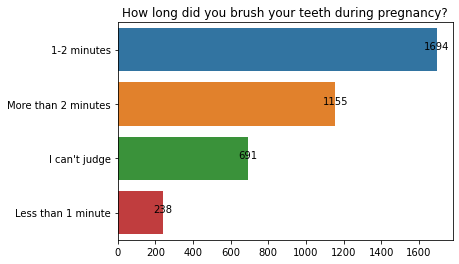

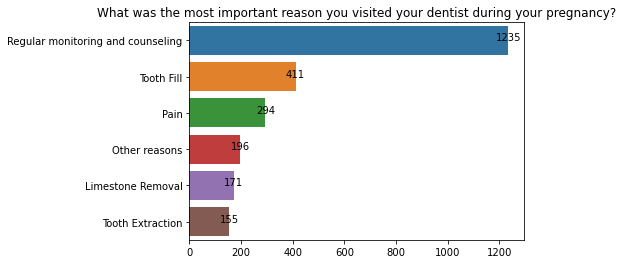

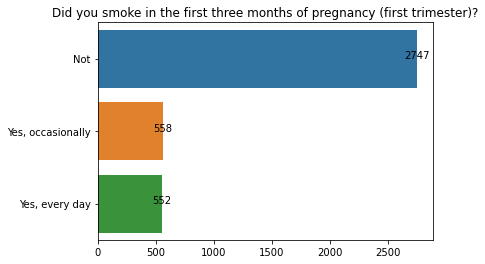

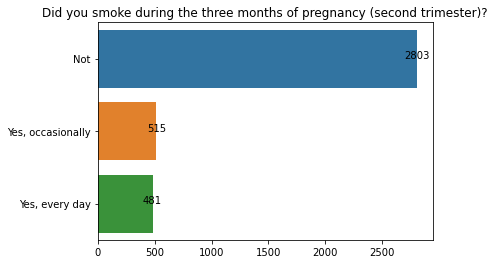

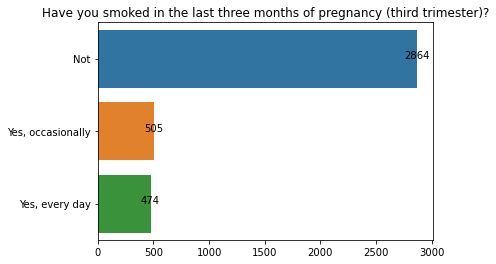

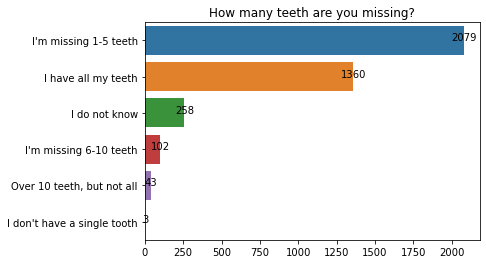

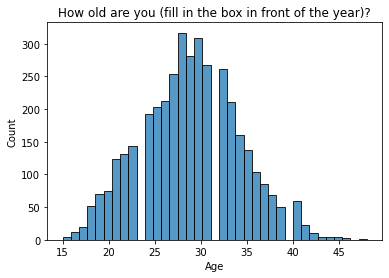

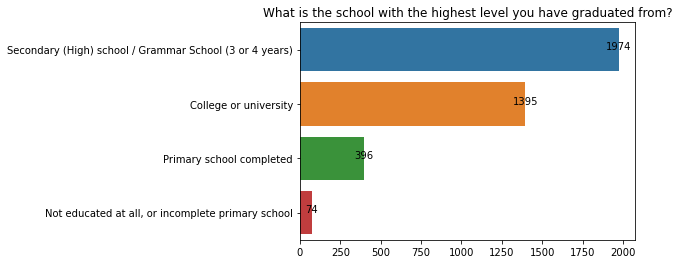

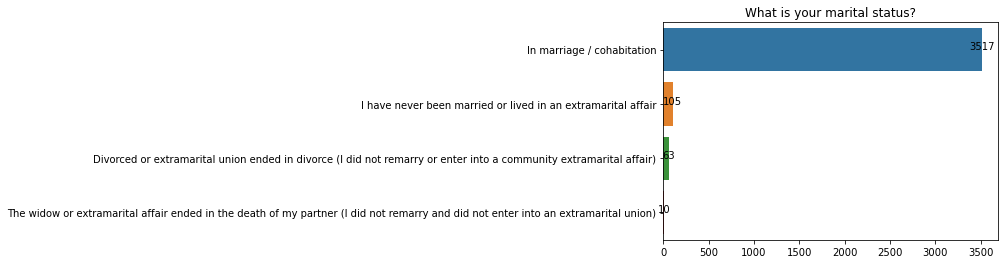

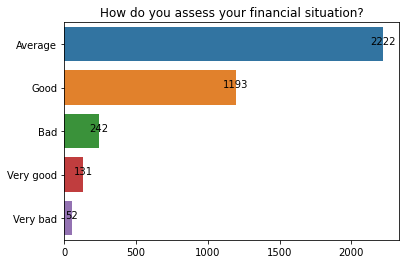

In [12]:
def barplot(idx, col, title):
    plt.figure(idx)
    if col not in numeric_col:
        val_cnts = data_subset[col].value_counts()
        text = [questions[col][val] for val in val_cnts.index]
        # replace x and y with each other for vertical plot
        ax = sns.barplot(y=text, x=val_cnts.values)
        ax.set_title(title)
        for ind, val in enumerate(val_cnts):
            ax.text(val, ind, val, color='black', ha="center")
        #for plot vertical plot
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    else:
        ax = sns.histplot(x=data_subset[col])
        ax.set_title(title)
        ax.set_xlabel('Age')
        
for idx, col in enumerate(data_subset.columns):
    title = questions[col]['text'] 
    barplot(idx, col, title)

### Check balance - for each answer Que16

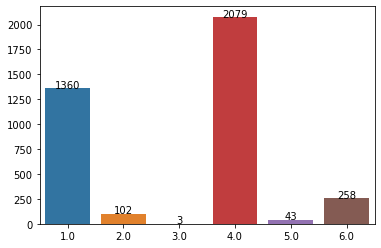

In [13]:
val_cnts = data_subset['Que16'].value_counts()
# replace x and y with each other for vertical plot
ax = sns.barplot(x=val_cnts.index, y=val_cnts.values)
for ind, val in val_cnts.items():
    ax.text(ind-1, val, val, color='black', ha="center")

### Strategy 1 - remove NaN

In [14]:
def missing_values_strategy_rem_nan(data):
    model_data = data_subset.dropna()
    model_data = model_data.reset_index(drop=True)
    return model_data

### Strategy 2 - median

In [15]:
def missing_values_strategy_median(data):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    model_data = pd.DataFrame(imputer.fit_transform(data))
    model_data.columns = data.columns
    model_data.index = data.index
    return model_data

### Strategy 3 - mean

In [16]:
def missing_values_strategy_mean(data):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    model_data = pd.DataFrame(imputer.fit_transform(data))
    model_data.columns = data.columns
    model_data.index = data.index
    # mean values are not integer numbers so rounding to int was necessary
    model_data = model_data.round()
    return model_data

### Strategy 4 - most frequent

In [17]:
def missing_values_strategy_most_freq(data):
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    model_data = pd.DataFrame(imputer.fit_transform(data))
    model_data.columns = data.columns
    model_data.index = data.index
    return model_data

### Strategy 5 - constant

In [18]:
def missing_values_strategy_const(data, const):
    imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=const)
    model_data = pd.DataFrame(imputer.fit_transform(data))
    model_data.columns = data.columns
    model_data.index = data.index
    print(model_data)
    return model_data

### Mapping - 0 or 1

In [19]:
def perform_mapping(model_data):
    for index, row in model_data.iterrows():
        for col in model_data.columns:
            if np.isnan(row[col]) or row[col]==0:
                continue
            if col not in numeric_col:
                row[col] = questions_map[col][int(row[col])]
            else:
                if col=='Que18_age':
                    if row[col]>=20 and row[col]<=34:
                        row[col] = 0
                    else:
                        row[col] = 1
    return model_data

### Check balance - for each class Que16

In [20]:
def check_balance_for_each_class(model_data, idx, title):
    plt.figure(idx)
    val_cnts = model_data['Que16'].value_counts()
    # replace x and y with each other for vertical plot
    ax = sns.barplot(x=val_cnts.index, y=val_cnts.values)
    ax.set_title(title)
    for ind, val in val_cnts.items():
        ax.text(ind, val, val, color='black', ha="center")

def check_balance(y_values, title):
    (unique, counts) = np.unique(y_values, return_counts=True)
    ax = sns.barplot(x=unique, y=counts)
    ax.set_title(title)
    for ind, val in enumerate(counts):
        ax.text(ind, val, val, color='black', ha="center")

## Prepare data

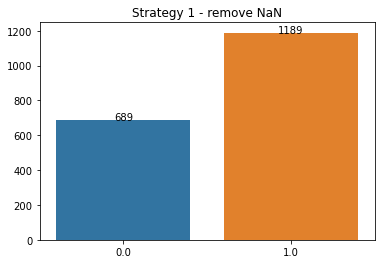

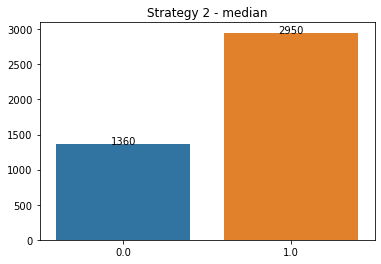

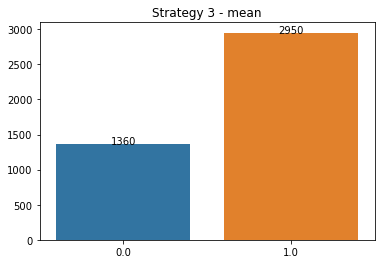

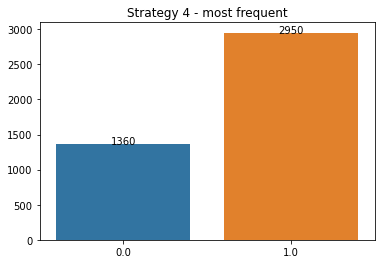

In [21]:
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
check_balance_for_each_class(model_data, 1, 'Strategy 1 - remove NaN')
model_data = missing_values_strategy_median(data_subset)
model_data = perform_mapping(model_data)
check_balance_for_each_class(model_data, 2, 'Strategy 2 - median')
model_data = missing_values_strategy_mean(data_subset)
model_data = perform_mapping(model_data)
check_balance_for_each_class(model_data, 3, 'Strategy 3 - mean')
model_data = missing_values_strategy_most_freq(data_subset)
model_data = perform_mapping(model_data)
check_balance_for_each_class(model_data, 4, 'Strategy 4 - most frequent')

In [22]:
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)

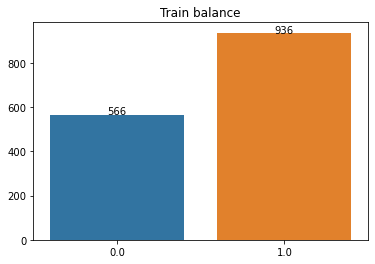

In [23]:
check_balance(y_train, 'Train balance')

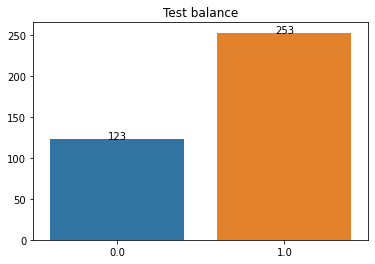

In [24]:
check_balance(y_test, 'Test balance')

### Over sampling

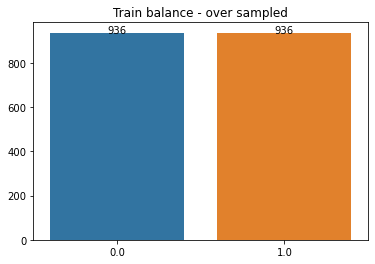

In [25]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
check_balance(y_train_resampled, 'Train balance - over sampled')

### Under sampling

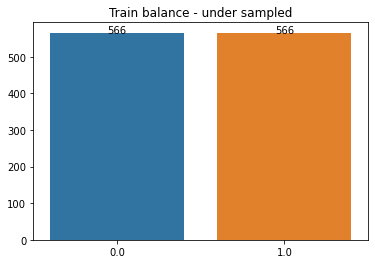

In [26]:
rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
check_balance(y_train_resampled, 'Train balance - under sampled')

### Combine - under and over sampling SMOTEENN

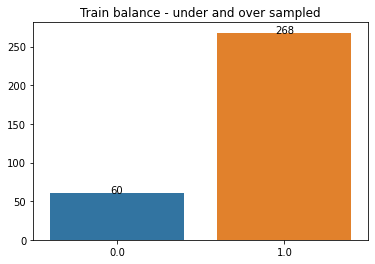

In [27]:
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
check_balance(y_train_resampled, 'Train balance - under and over sampled')

In [28]:
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

## Models

### Logistic Regression 1 - remNaN, whole mapped data, oversampling

In [29]:
X_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f','Que11', 'Que12', 'Que13', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_df = pd.DataFrame(data=X_train_resampled, columns=X_cols)
y_train_df = pd.DataFrame(data=y_train_resampled, columns=y_col)
logit = Logit(y_train_df, X_train_df)
lg = logit.fit()
print(lg.summary())
yhat = lg.predict(X_test)
prediction = list(map(round, yhat))
print('Test accuracy = ', accuracy_score(y_test, prediction))

Optimization terminated successfully.
         Current function value: 0.611010
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Que16   No. Observations:                 1380
Model:                          Logit   Df Residuals:                     1357
Method:                           MLE   Df Model:                           22
Date:                Mon, 05 Jul 2021   Pseudo R-squ.:                  0.1185
Time:                        19:11:35   Log-Likelihood:                -843.19
converged:                       True   LL-Null:                       -956.54
Covariance Type:            nonrobust   LLR p-value:                 6.268e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Que1           0.7078      0.197      3.587      0.000       0.321       1.095
Que2          -0.1665      0.

Best results for: [Que1, Que6, Que10_c, Que10_d, Que10_e, Que11, Que14, Que15, Que17, Que20]

### Logistic Regression 2 - remNaN, recommended mapped data, oversampling

In [30]:
X_cols = ['Que3', 'Que6', 'Que11', 'Que12', 'Que13', 'Que18_age', 'Que19', 'Que20', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_df = pd.DataFrame(data=X_train_resampled, columns=X_cols)
y_train_df = pd.DataFrame(data=y_train_resampled, columns=y_col)
logit = Logit(y_train_df, X_train_df)
lg = logit.fit()
print(lg.summary())
yhat = lg.predict(X_test)
prediction = list(map(round, yhat))
print('Test accuracy = ', accuracy_score(y_test, prediction))

Optimization terminated successfully.
         Current function value: 0.669814
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Que16   No. Observations:                 1872
Model:                          Logit   Df Residuals:                     1863
Method:                           MLE   Df Model:                            8
Date:                Mon, 05 Jul 2021   Pseudo R-squ.:                 0.03366
Time:                        19:11:36   Log-Likelihood:                -1253.9
converged:                       True   LL-Null:                       -1297.6
Covariance Type:            nonrobust   LLR p-value:                 1.596e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Que3          -0.2825      0.082     -3.450      0.001      -0.443      -0.122
Que6           0.4674      0.

Best results for: [Que3, Que6, Que12, Que19, Que20]

### Logistic Regression 3 - median, oversampling, whole mapped data, oversampling

In [ ]:
X_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f','Que11', 'Que12', 'Que13', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_median(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_df = pd.DataFrame(data=X_train_resampled, columns=X_cols)
y_train_df = pd.DataFrame(data=y_train_resampled, columns=y_col)
logit = Logit(y_train_df, X_train_df)
lg = logit.fit()
print(lg.summary())
yhat = lg.predict(X_test)
prediction = list(map(round, yhat))
print('Test accuracy = ', accuracy_score(y_test, prediction))

Best results for: [Que1, Que4, Que5, Que10_c, Que10_e, Que10_f, Que14, Que15, Que17, Que19, Que22]

### Logistic Regression 4 - median, oversampling, recommended data, oversampling

In [ ]:
X_cols = ['Que3', 'Que6', 'Que11', 'Que12', 'Que13', 'Que18_age', 'Que19', 'Que20', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_median(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_df = pd.DataFrame(data=X_train_resampled, columns=X_cols)
y_train_df = pd.DataFrame(data=y_train_resampled, columns=y_col)
logit = Logit(y_train_df, X_train_df)
lg = logit.fit()
print(lg.summary())
yhat = lg.predict(X_test)
prediction = list(map(round, yhat))
print('Test accuracy = ', accuracy_score(y_test, prediction))

Best results for: [Que6, Que19]

### Random Forest 1 - remNaN, whole mapped data, oversampling

In [ ]:
X_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f','Que11', 'Que12', 'Que13', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
rf = RandomForestClassifier()
rf = rf.fit(X_train_resampled, y_train_resampled)
prediction = rf.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, prediction))

dot_data = export_graphviz(rf.estimators_[0], 
                           feature_names=X_cols,
                           class_names=['0', '1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render(IMG_DIR+'rf1')

### Random Forest 2 - remNaN, recommended mapped data, oversampling

In [ ]:
X_cols = ['Que3', 'Que6', 'Que11', 'Que12', 'Que13', 'Que18_age', 'Que19', 'Que20', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
rf = RandomForestClassifier()
rf = rf.fit(X_train_resampled, y_train_resampled)
prediction = rf.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, prediction))

dot_data = export_graphviz(rf.estimators_[0], 
                           feature_names=X_cols,
                           class_names=['0', '1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render(IMG_DIR+'rf2')

### Random Forest 3 - median, oversampling, whole mapped data, oversampling

In [ ]:
X_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f','Que11', 'Que12', 'Que13', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_median(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
rf = RandomForestClassifier()
rf = rf.fit(X_train_resampled, y_train_resampled)
prediction = rf.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, prediction))

dot_data = export_graphviz(rf.estimators_[0], 
                           feature_names=X_cols,
                           class_names=['0', '1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render(IMG_DIR+'rf3')

### Random Forest 4 - median, oversampling, recommended data, oversampling

In [ ]:
X_cols = ['Que3', 'Que6', 'Que11', 'Que12', 'Que13', 'Que18_age', 'Que19', 'Que20', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_median(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
rf = RandomForestClassifier()
rf = rf.fit(X_train_resampled, y_train_resampled)
prediction = rf.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, prediction))

dot_data = export_graphviz(rf.estimators_[0], 
                           feature_names=X_cols,
                           class_names=['0', '1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render(IMG_DIR+'rf4')

### Decision Tree 1 - remNaN, whole mapped data, oversampling

In [ ]:
X_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f','Que11', 'Que12', 'Que13', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train_resampled, y_train_resampled)
prediction = dtc.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, prediction))

dot_data = export_graphviz(dtc, 
                           feature_names=X_cols,
                           class_names=['0', '1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render(IMG_DIR+'dtc1')

### Decision Tree 2 - remNaN, recommended mapped data, oversampling

In [ ]:
X_cols = ['Que3', 'Que6', 'Que11', 'Que12', 'Que13', 'Que18_age', 'Que19', 'Que20', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_rem_nan(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train_resampled, y_train_resampled)
prediction = dtc.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, prediction))

dot_data = export_graphviz(dtc, 
                           feature_names=X_cols,
                           class_names=['0', '1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render(IMG_DIR+'dtc2')

### Decision Tree 3 - median, oversampling, whole mapped data, oversampling

In [ ]:
X_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f','Que11', 'Que12', 'Que13', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_median(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train_resampled, y_train_resampled)
prediction = dtc.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, prediction))

dot_data = export_graphviz(dtc, 
                           feature_names=X_cols,
                           class_names=['0', '1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render(IMG_DIR+'dtc3')

### Decision Tree 4 - median, oversampling, recommended data, oversampling

In [ ]:
X_cols = ['Que3', 'Que6', 'Que11', 'Que12', 'Que13', 'Que18_age', 'Que19', 'Que20', 'Que22']
y_col = ['Que16']
data_subset = data[X_cols+y_col]
model_data = missing_values_strategy_median(data_subset)
model_data = perform_mapping(model_data)
without_target = model_data.drop(columns=['Que16'])
target_var = model_data['Que16']
X_train, X_test, y_train, y_test = train_test_split(without_target.values, target_var.values, test_size=0.20, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train_resampled, y_train_resampled)
prediction = dtc.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, prediction))

dot_data = export_graphviz(dtc, 
                           feature_names=X_cols,
                           class_names=['0', '1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render(IMG_DIR+'dtc4')